In [33]:
import pandas as pd
import seaborn as sns
bc = pd.read_csv('C:/Users/mille/school/year3/Data301/project-group08-project/data/processed/Bitcoin Historical Data cleaned.csv')
print('\033[1m'+'Changing names and reordering data'+'\033[0m')
bc.rename(columns={'Vol.':'Volume'}, inplace=True)
bc = bc.dropna(axis=0)
bc = bc.reindex(columns=['Date','Open','Close','Low','High','Volume'])
bc = bc.iloc[::-1]
bc = bc.reset_index(drop=True)
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
bc['Volume'] = bc['Volume'].apply(value_to_float)   
bc

Changing names and reordering data


,Date,Open,Close,Low,High,Volume
0,"Aug 07, 2015",278,277.9,274.3,279.6,42810.0
1,"Aug 08, 2015",277.9,258.6,257.4,278.9,82540.0
2,"Aug 09, 2015",258.6,263.9,258.6,266.8,57480.0
3,"Aug 10, 2015",263.9,263.3,260.5,266.6,48570.0
4,"Aug 11, 2015",263.3,269,261.4,269.9,51360.0
...,...,...,...,...,...,...
2176,"Jul 22, 2021","32,131.70","32,298.90","31,729.40","32,585.40",64870.0
2177,"Jul 23, 2021","32,297.90","33,603.30","32,041.10","33,605.60",66150.0
2178,"Jul 24, 2021","33,600.50","33,824.80","33,412.90","33,955.00",67140.0
2179,"Jul 25, 2021","34,392.50","35,391.10","33,881.30","35,391.10",65100.0


In [9]:
import pandas as pd
import seaborn as sns
eth = pd.read_csv('C:/Users/mille/school/year3/Data301/project-group08-project/data/processed/etherium cleaned.csv');
print('\033[1m'+'Changing names and reordering data'+'\033[0m')
eth = eth.dropna(axis=0)
eth = eth.reindex(columns=['Date','Open','Close','Low','High','Volume'])
eth = eth.iloc[::-1]
eth = eth.reset_index(drop=True)
eth

Changing names and reordering data


,Date,Open,Close,Low,High,Volume
0,07/08/15,2.831620,2.772120,2.521120,3.536610,1.643290e+05
1,08/08/15,2.793760,0.753325,0.714725,2.798810,6.741880e+05
2,09/08/15,0.706136,0.701897,0.629191,0.879810,5.321700e+05
3,10/08/15,0.713989,0.708448,0.636546,0.729854,4.052830e+05
4,11/08/15,0.708087,1.067860,0.663235,1.131410,1.463100e+06
...,...,...,...,...,...,...
2172,22/07/21,1994.822876,2025.202759,1954.297852,2044.116455,1.749548e+10
2173,23/07/21,2025.105713,2124.776611,2000.436279,2129.441162,1.620039e+10
2174,24/07/21,2123.961182,2189.218750,2107.323486,2197.649414,1.605745e+10
2175,25/07/21,2187.145508,2191.373779,2108.829834,2194.438232,1.456648e+10


Visualizations for both Bitcoin and Etherium

KeyError: 'Volume'

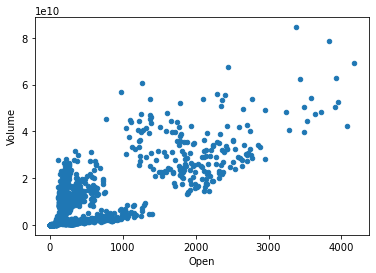

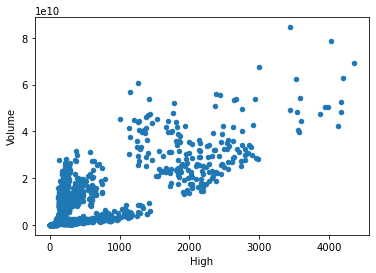

In [36]:
import seaborn as sns

eth = pd.read_csv('C:/Users/mille/school/year3/Data301/project-group08-project/data/processed/etherium cleaned.csv')
bc = pd.read_csv('C:/Users/mille/school/year3/Data301/project-group08-project/data/processed/Bitcoin Historical Data cleaned.csv')
eth.plot(kind='scatter', x='Open', y='Volume')
eth.plot(kind='scatter', x='High', y='Volume')

